### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data 

In [2]:
df = pd.read_csv(r"C:\Users\dolly\Downloads\Nat_Gas.csv")

### Fetching data

In [3]:
df

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


### Before plotting visuals, we will do these two tasks:

**1. Convert 'Dates' column to datetime format and coerce any invalid entries to NaT**

**2. Ensure 'Prices' column is in float format for numerical analysis and plotting**

In [4]:
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce') 
df['Prices'] = df['Prices'].astype(float)

C:\Users\dolly\AppData\Local\Temp\ipykernel_15848\2353115452.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')


### Plotting visuals

### Plot 1: Price Trend Over Time

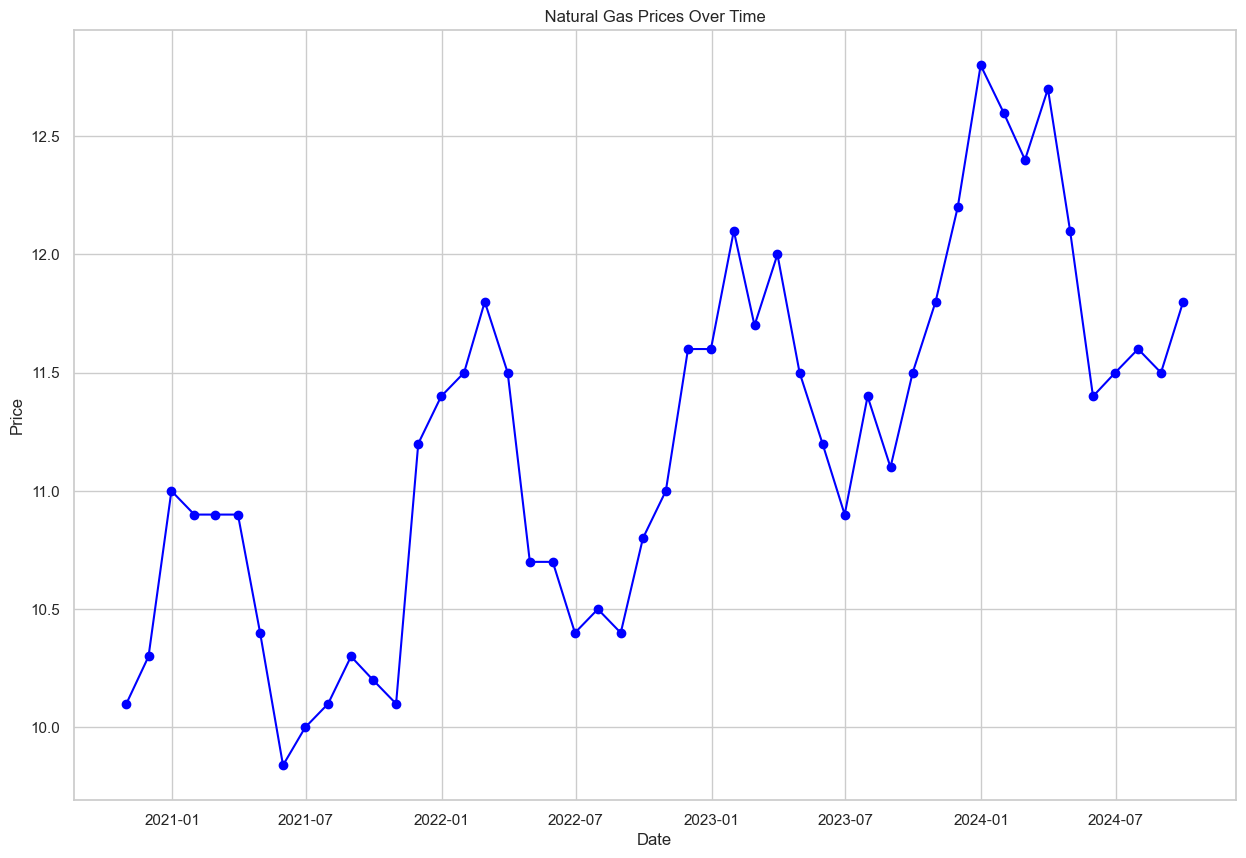

In [5]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(15,10))
plt.plot(df['Dates'], df['Prices'], marker='o', color='blue')
plt.title(' Natural Gas Prices Over Time ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Plot 2: Average Price by Month

C:\Users\dolly\AppData\Local\Temp\ipykernel_15848\4036947640.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Prices', data=df, palette='coolwarm',


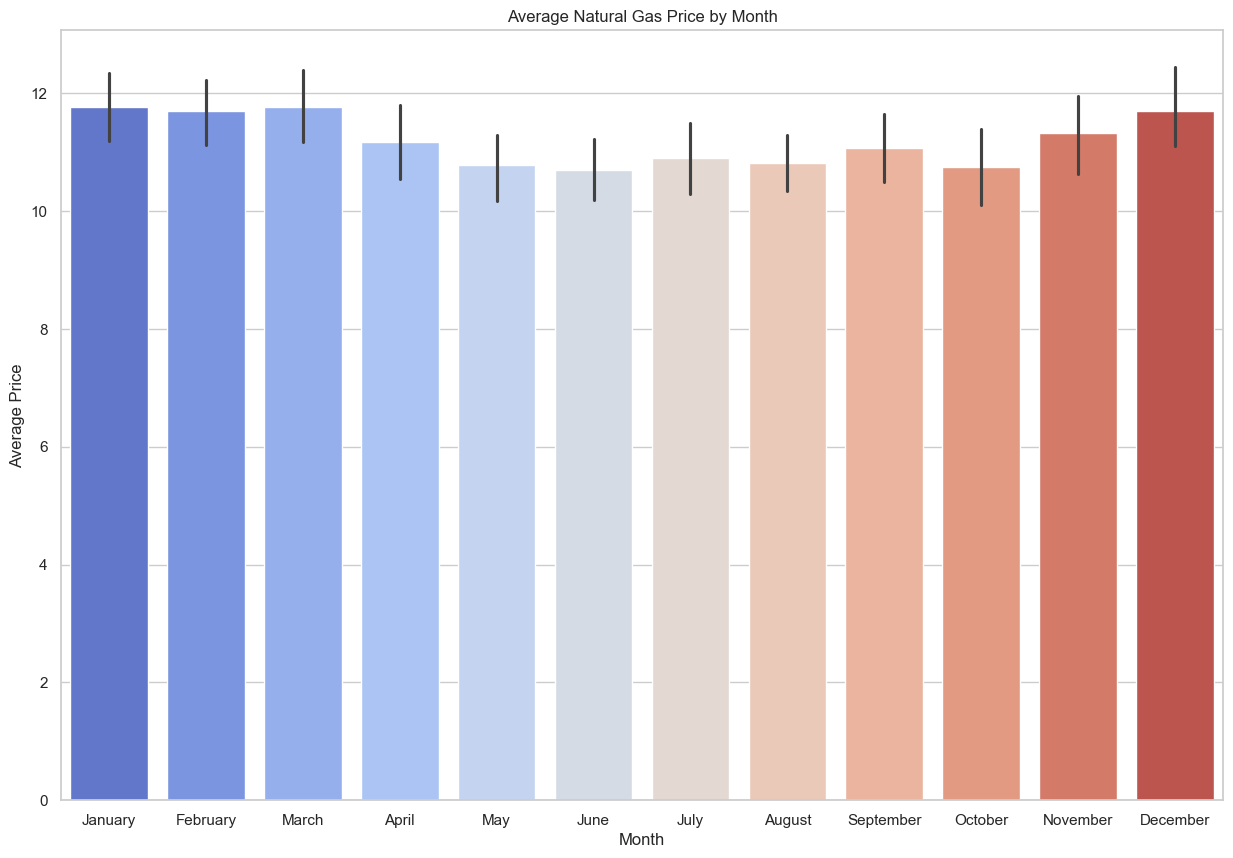

In [8]:
df['Month'] = df['Dates'].dt.month_name()

plt.figure(figsize=(15,10))
sns.barplot(x='Month', y='Prices', data=df, palette='coolwarm',
            order=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Average Natural Gas Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

### Plot 3: Month-to-Month Percentage Change

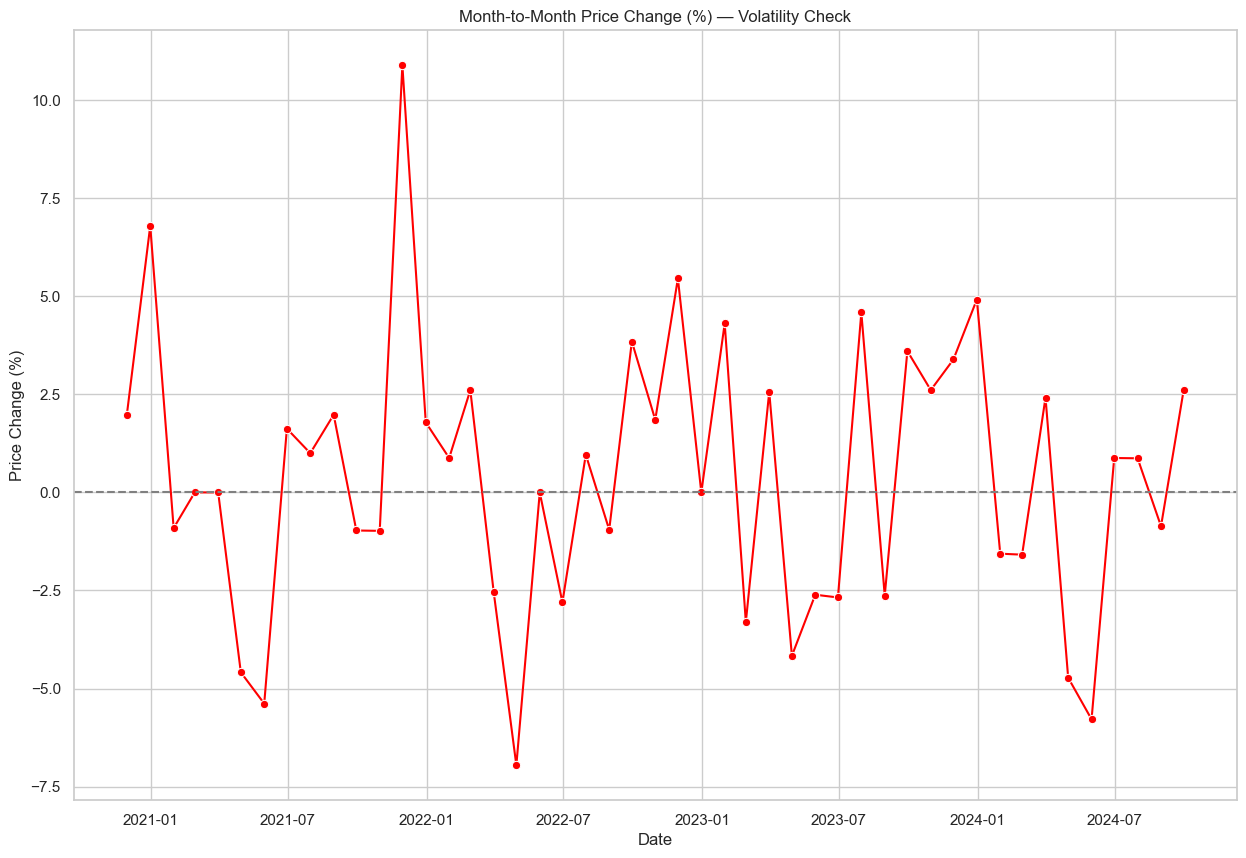

In [9]:
df['Price_Change_%'] = df['Prices'].pct_change() * 100

plt.figure(figsize=(15,10))
sns.lineplot(x='Dates', y='Price_Change_%', data=df, color='red', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Month-to-Month Price Change (%) — Volatility Check')
plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.show()

### Plot 4: Monthly Price Variability

C:\Users\dolly\AppData\Local\Temp\ipykernel_15848\3625703638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Prices', data=df,


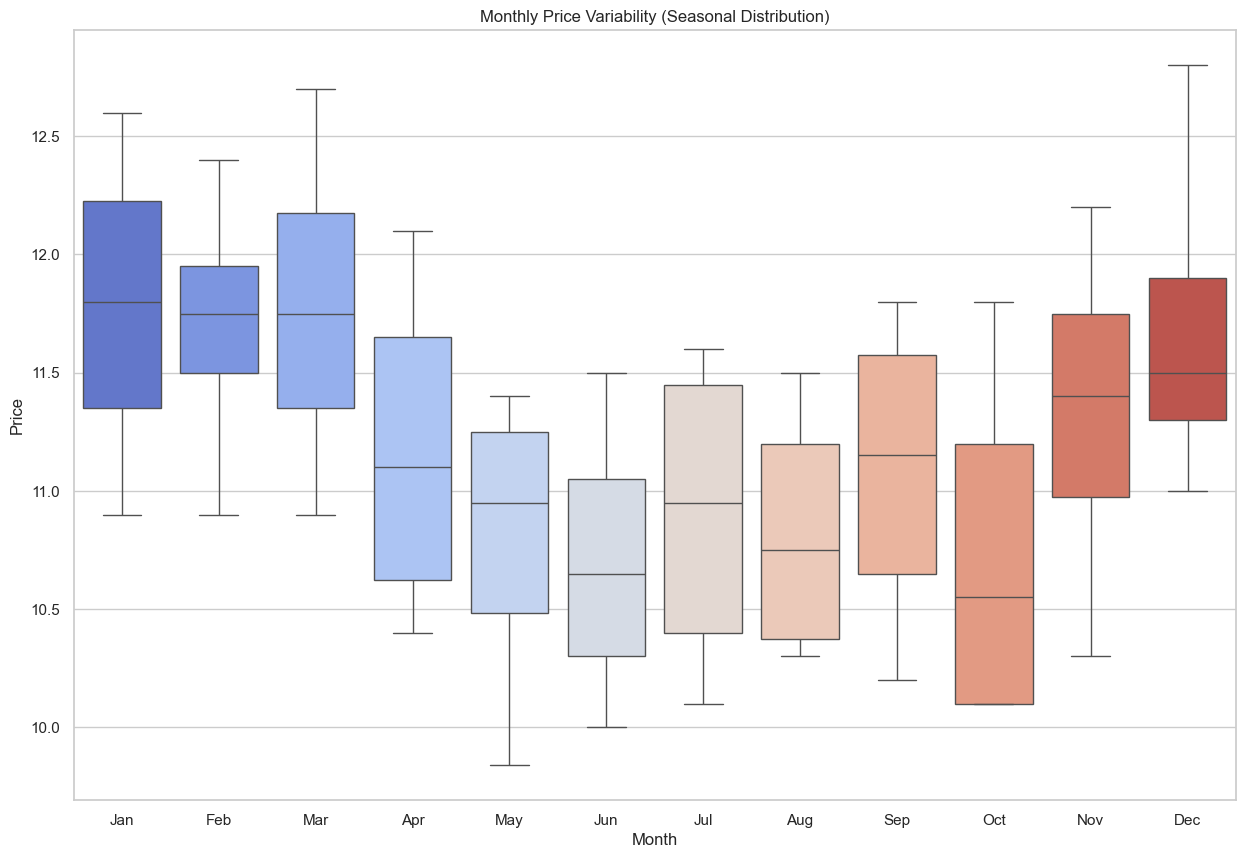

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Month', y='Prices', data=df, 
            order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
            palette='coolwarm')
plt.title('Monthly Price Variability (Seasonal Distribution)')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

### Plot 5: Rolling Average vs. Actual Prices

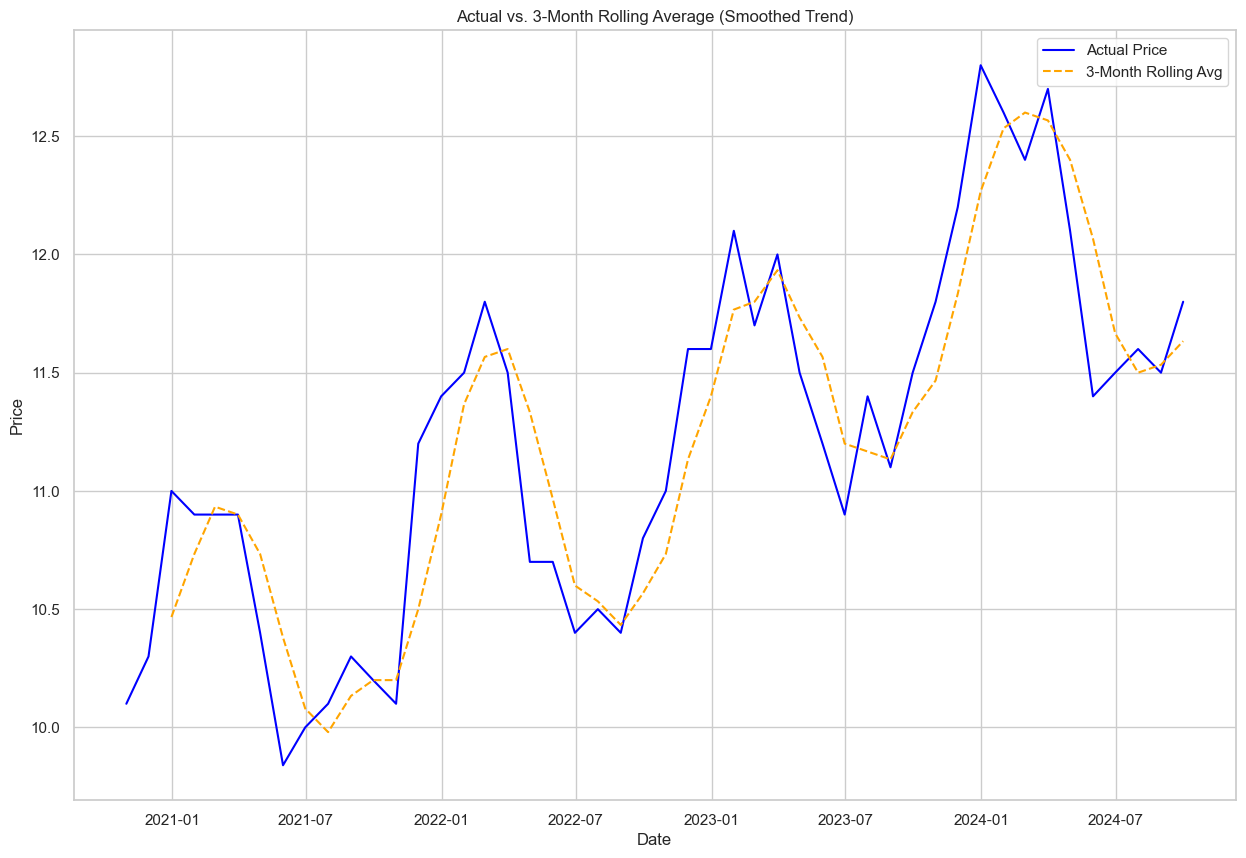

In [16]:
df['Rolling_Avg'] = df['Prices'].rolling(window=3).mean()

plt.figure(figsize=(15,10))
plt.plot(df['Dates'], df['Prices'], label='Actual Price', color='blue')
plt.plot(df['Dates'], df['Rolling_Avg'], label='3-Month Rolling Avg', color='orange', linestyle='--')
plt.title('Actual vs. 3-Month Rolling Average (Smoothed Trend)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Conclusion:

**1. Natural Gas Prices Over Time**

*Natural gas prices fluctuate significantly over time, showing both upward and downward trends that indicate changing market conditions.*

**2. Average Natural Gas Price by Month**

*Prices are generally higher during winter months and lower in summer, confirming strong seasonal effects on natural gas demand and pricing.*

**3. Month-to-Month Price Change (%)**

*Natural gas prices experience noticeable month-to-month volatility, reflecting market instability and short-term supply–demand shifts.*

**4. Monthly Price Variability**

*Price variation differs across months, with some months showing higher unpredictability and occasional extreme price points.*

**5. Actual vs. 3-Month Rolling Average**

*The rolling average smooths short-term fluctuations, revealing a clearer long-term price direction and overall market trend.*